# Understand the data

First thing I want to do before I work with the data is to understand it, so I will use this notebook to figure out like how many null values are in the dataset etc.

## Imports

In [52]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

## Load the data

In [53]:
dataset = pd.read_csv('../data/adult_raw.csv')

## Understand the Data

### Print the Features

In [54]:
print(dataset.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


### Clean the Columns

In [55]:
dataset.columns = [col.replace('.', '_') for col in dataset.columns]
print(dataset.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')


### Count Categorical

In [56]:
categorical = dataset.select_dtypes(include='object').columns
print(categorical)
for col in categorical:
    print(f"\nValue counts for {col}:\n", dataset[col].value_counts())

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

Value counts for workclass:
 workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Value counts for education:
 education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

Value counts for marital_status:
 marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced        

### Count Null

In [57]:
print(dataset.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


### Print Data and Target Distribution

   age workclass  fnlwgt     education  education_num marital_status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital_gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital_loss  hours_per_week native_country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


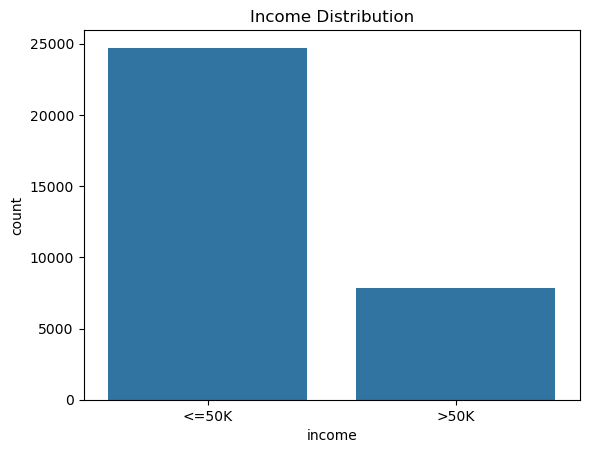

In [58]:
print(dataset.head())
print(dataset.info())

sb.countplot(data=dataset, x='income')
plt.title('Income Distribution')
plt.show()

### Replace ? with NaN

In [59]:
dataset.replace('?', np.nan, inplace=True)

print(dataset.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


### Visualising the Missing Data

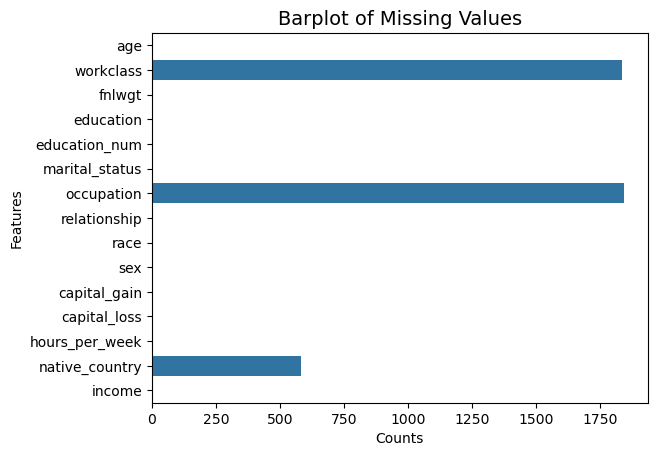

In [60]:
sb.barplot(x=dataset.isnull().sum().values, y=dataset.isnull().sum().index)

plt.title("Barplot of Missing Values", fontsize=14)
plt.ylabel("Features")
plt.xlabel("Counts")
plt.show()


### Plotting Distributions of Numeric features

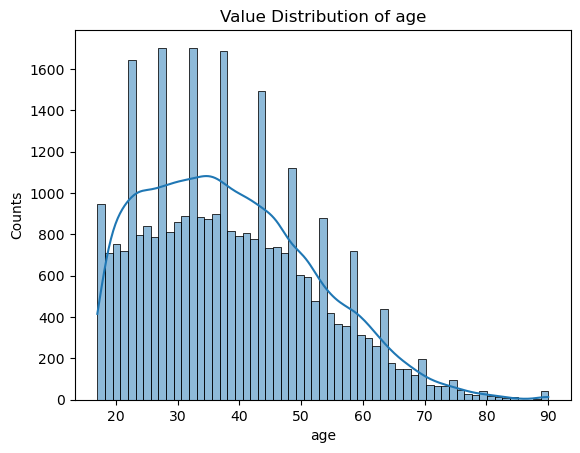

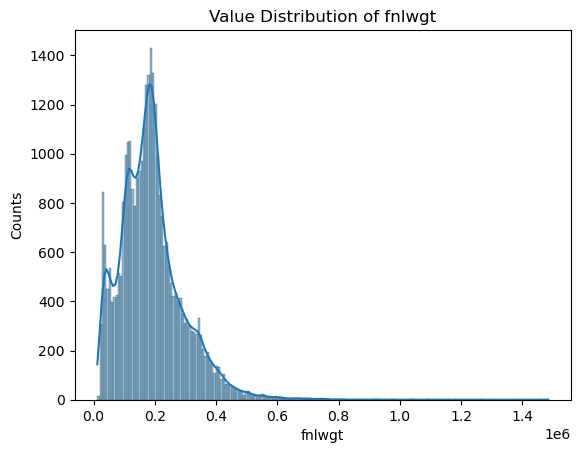

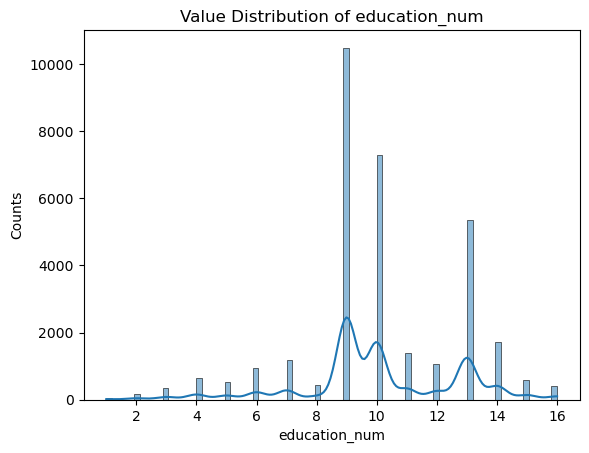

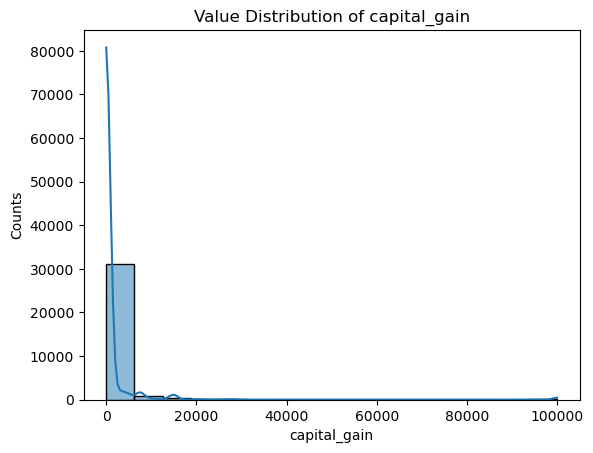

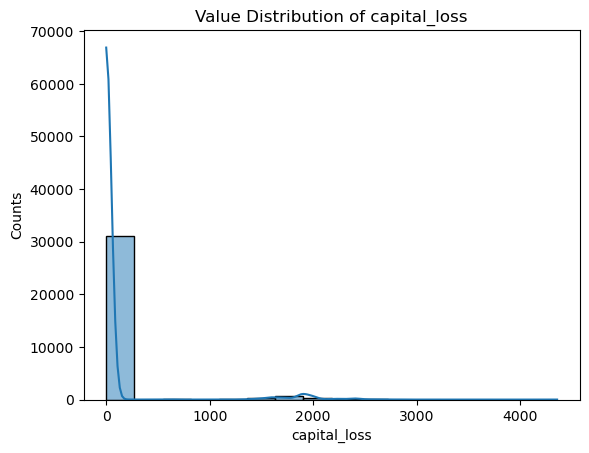

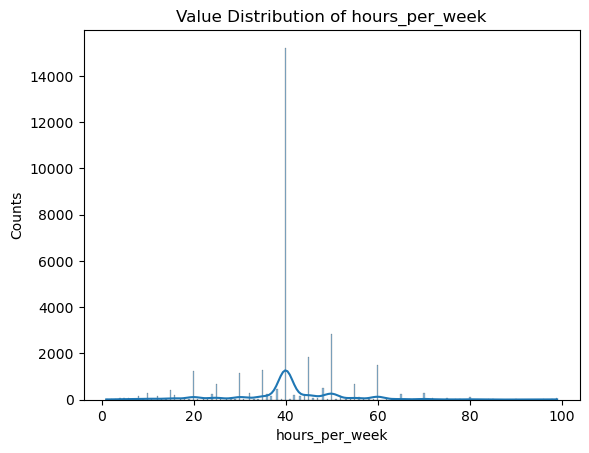

In [61]:
numeric = dataset.select_dtypes(include=['number']).columns

for col in numeric:
    sb.histplot(dataset[col], kde=True)
    plt.title(f'Value Distribution of {col}')
    plt.ylabel('Counts')
    plt.xlabel(col)
    plt.show()

### Correlation

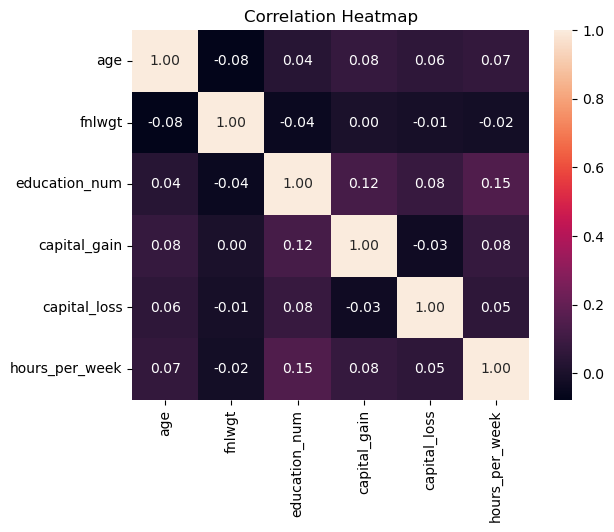

In [62]:
sb.heatmap(dataset[numeric].corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Conclusions

From what I could see from the dataset, it seems that there are some concerns that I should keep in mind when I want to work with this dataset.

### Column Name Change
First thing is that I should make the **dots (.)** in the column names into **underescores (_)**, this is just because there might be some issues with Pandas if I want to have like `dataset.marital.status` it will be an error. However, it will be fine if it was `dataset.marital_status`.

Now this is not a big issue, especially because `dataset['marital.status']` still works.

### ? as Null
Second thing is that this dataset does not have null values. Instead, it uses **?**. So I need to keep that in mind when I am working with this dataset

### Which Features Have Missing Values
After replacing the **?** with **NaN**, I noticed that only **3** features have missing values, and they are:
- **workplace**
- **occupation**
- **native_country**

### Distribution of Feature Values
There was not much interesting about the distribution values except that for certain features like the amount of hours worked per week is almost all **40** hours.

Also the histograms of capital gain and capital loss did not really give me any useful information, I should remove the outliers if I wanted to learn more

### Correlation
There was very little correlation between the features, so I will probably keep all of them during the training

### Inequality Between <=$50k and >$50k
The number of records of people that make **<=$50k** and the number of people that make **>$50k** is very different, this could result into the model just guessing that people make **<=$50k** just because that is more likely in the dataset